<a href="https://colab.research.google.com/github/KArtik-34/Beverage-Sales-Analysis/blob/main/Notebook/Beverage_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1️⃣ Introduction**


---



#**Problem Statement:**
**The goal of this analysis is to uncover key insights into beverage sales trends, including:**

* Top-performing regions and products
* Impact of discounts on sales
* Price elasticity and consumer behavior
* Category-wise sales distribution
* Yearly and quarterly trends for forecasting
* Most Selling Product
* Region-Wise Sales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2️⃣ Importing Required Libraries**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

#**3️⃣ Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Beverage Sales Data/beverage_sales_data.csv")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [ ]:
df.head()


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [ ]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price,Order_Date
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06,8999910
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02,2022-07-01 16:18:18.126182144
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01,2021-01-01 00:00:00
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00,2021-10-01 00:00:00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01,2022-07-02 00:00:00
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01,2023-04-01 00:00:00
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04,2023-12-30 00:00:00
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02,NaN


#**4️⃣ Data Preprocessing**

In [ ]:
print(df.isnull())

         Order_ID  Customer_ID  Customer_Type  Product  Category  Unit_Price  \
0           False        False          False    False     False       False   
1           False        False          False    False     False       False   
2           False        False          False    False     False       False   
3           False        False          False    False     False       False   
4           False        False          False    False     False       False   
...           ...          ...            ...      ...       ...         ...   
8999905     False        False          False    False     False       False   
8999906     False        False          False    False     False       False   
8999907     False        False          False    False     False       False   
8999908     False        False          False    False     False       False   
8999909     False        False          False    False     False       False   

         Quantity  Discount  Total_Pric

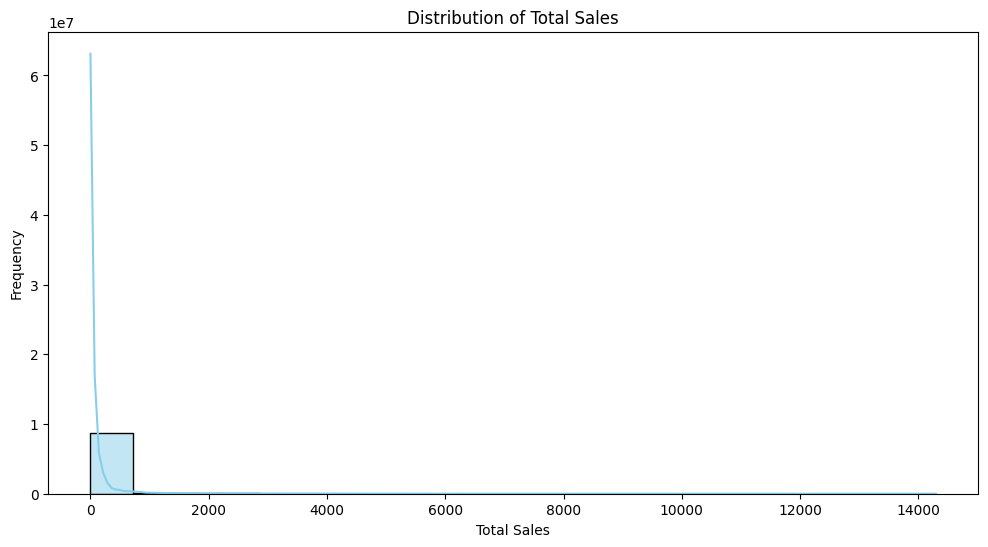

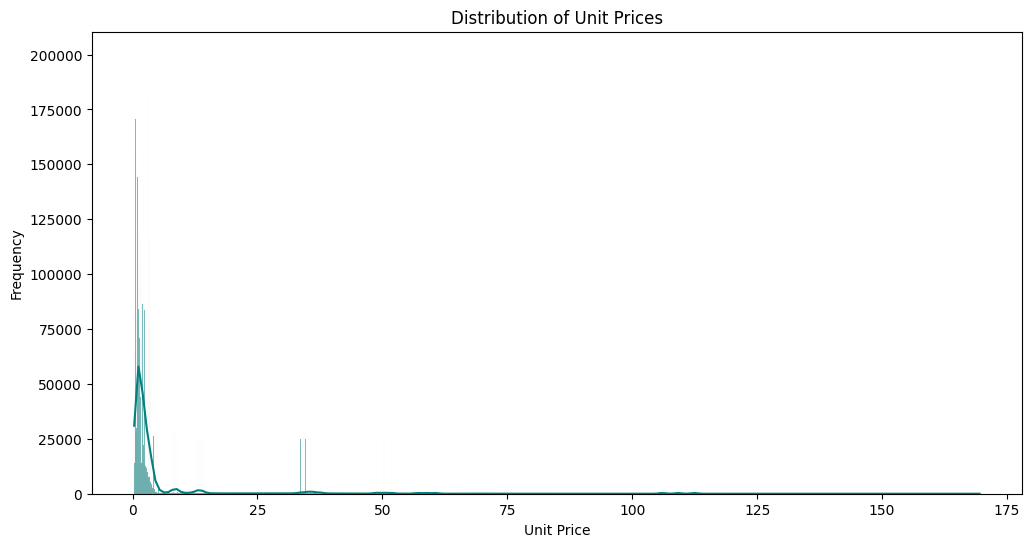

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Total_Price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Unit_Price'], kde=True, color='teal')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

**The Graph is Highly Skewed**


> Low Tickets products are selled at higher volume


> higher priced units have low volume sales





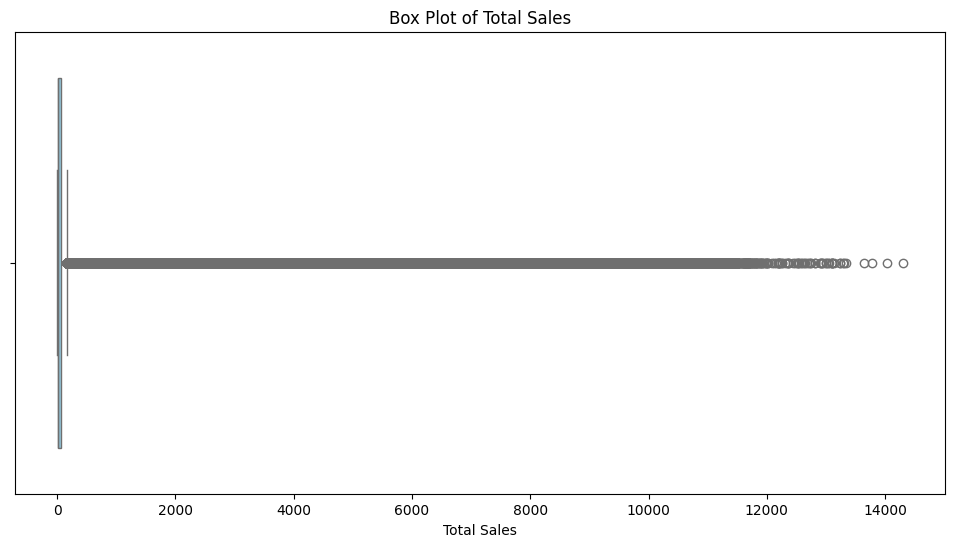

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total_Price'], color='skyblue')
plt.title('Box Plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()


In [ ]:
threshold = df['Total_Price'].quantile(0.99)
outliers = df[df['Total_Price'] > threshold]

print("Top 1% Sales values: ")
print(outliers[["Product", "Total_Price", "Region" ]])


Top 1% Sales values: 
                Product  Total_Price                  Region
321      Veuve Clicquot      5661.01                  Bremen
380             Bacardi      3234.33     Nordrhein-Westfalen
491      Veuve Clicquot      5852.76           Niedersachsen
526      Moët & Chandon      3862.92           Niedersachsen
719           Tanqueray      2789.86           Niedersachsen
...                 ...          ...                     ...
8999238  Johnnie Walker      5321.52         Rheinland-Pfalz
8999574  Veuve Clicquot      8988.75                 Sachsen
8999637    Jack Daniels      2870.63  Mecklenburg-Vorpommern
8999774     Havana Club      2556.11               Thüringen
8999875  Veuve Clicquot      5006.07                Saarland

[90000 rows x 3 columns]


In [ ]:
df.groupby("Product")["Total_Price"].mean().sort_values(ascending=False).head(10)

,Total_Price
Product,
Veuve Clicquot,1763.667454
Moët & Chandon,1523.737337
Johnnie Walker,845.130129
Jack Daniels,831.268502
Tanqueray,747.846197
Bacardi,508.554592
Havana Club,502.867179
Sauvignon Blanc,202.511290
Chardonnay,182.987331


**Premium Alcohol Brands Dominates the sale**

  ***The most expensive sales involve high-end alcoholic beverages like:***
*  Veuve Clicquot (Champagne)
*  Moët & Chandon (Champagne)
*  Johnnie Walker (Whisky)
*  Jack Daniels (Whisky)
*  Tanqueray (Gin)
*  Bacardi (Rum)



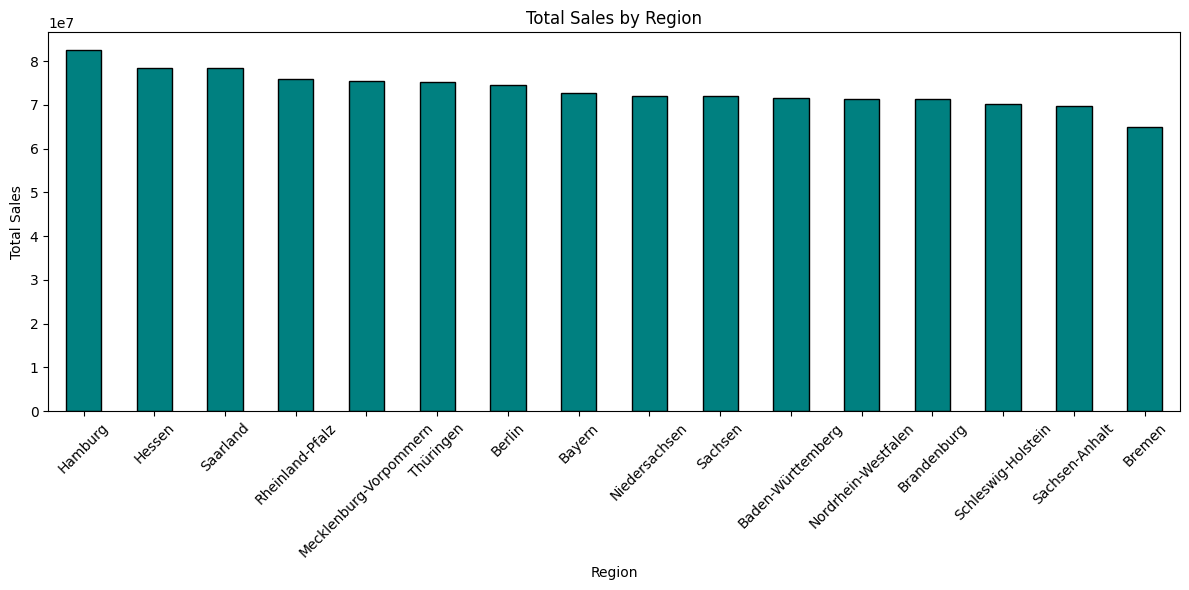

In [ ]:
region_total_sales = df.groupby("Region")["Total_Price"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = region_total_sales.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Region_Sales = df.groupby('Region')['Total_Price'].sum().sort_values(ascending = False)
print(Region_Sales.head(10))

Region
Hamburg                   82470771.98
Hessen                    78400110.19
Saarland                  78390587.15
Rheinland-Pfalz           75838676.99
Mecklenburg-Vorpommern    75517247.16
Thüringen                 75324865.47
Berlin                    74567927.53
Bayern                    72825399.18
Niedersachsen             71959050.52
Sachsen                   71946991.38
Name: Total_Price, dtype: float64


In [ ]:
df.groupby("Region")["Total_Price"].count().sort_values(ascending=False).head(10)

,Total_Price
Region,
Hamburg,604054
Rheinland-Pfalz,577967
Niedersachsen,577005
Saarland,573596
Sachsen,572827
Nordrhein-Westfalen,568797
Bremen,568223
Schleswig-Holstein,565825
Thüringen,562554


In [ ]:
saarland_data = df[(df['Category'] == 'Alcoholic Beverages') & (df['Region'] == 'Saarland')]

In [ ]:
saarland_avg_sales = saarland_data.groupby('Product')['Total_Price'].mean().sort_values(ascending=False)
print("Average Sale Value per Product in Saarland:")
print(saarland_avg_sales)

Average Sale Value per Product in Saarland:
Product
Veuve Clicquot       1816.726879
Moët & Chandon       1560.381010
Johnnie Walker        882.956987
Jack Daniels          848.856052
Tanqueray             802.612230
Bacardi               528.243235
Havana Club           521.255402
Sauvignon Blanc       212.057503
Chardonnay            195.757198
Riesling              191.076275
Merlot                188.483160
Rotkäppchen Sekt      157.909077
Erdinger Weißbier      48.239132
Augustiner             43.076623
Jever                  36.078735
Kölsch                 35.950853
Krombacher             34.980411
Beck's                 34.625220
Warsteiner             31.485912
Name: Total_Price, dtype: float64


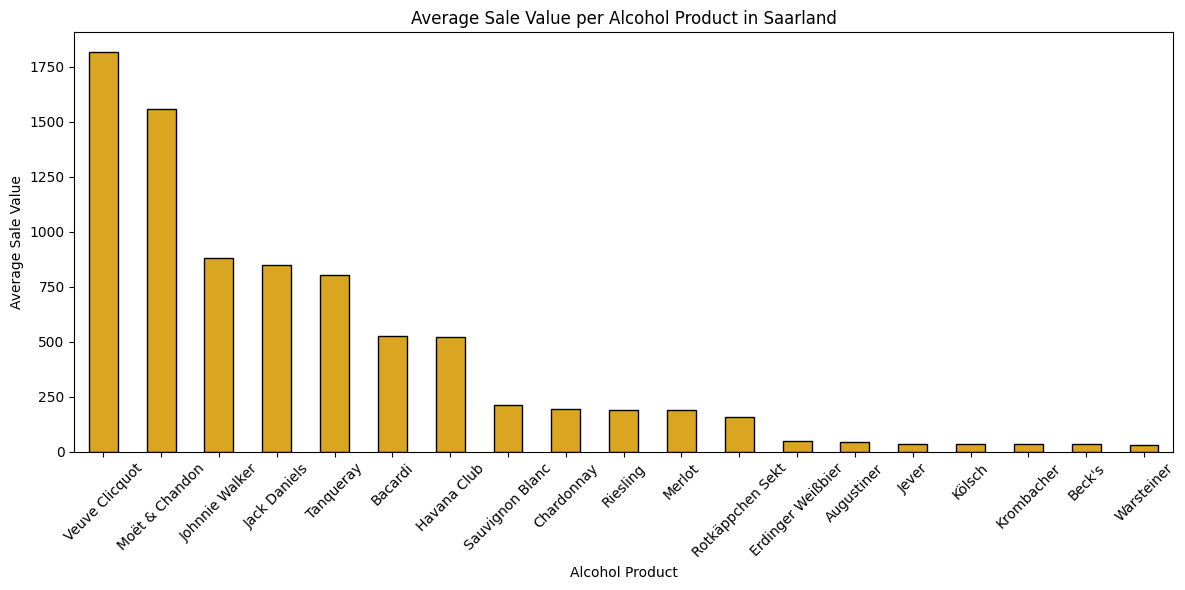

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12,6))
ax = saarland_avg_sales.plot(kind='bar', color='goldenrod', edgecolor='black')
plt.title('Average Sale Value per Alcohol Product in Saarland')
plt.xlabel('Alcohol Product')
plt.ylabel('Average Sale Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Grouping by Region and Product to see total sales per product per region
region_product_sales = df.groupby(["Region", "Product"])["Total_Price"].sum().unstack().fillna(0)

# Focusing on premium products
premium_brands = ["Veuve Clicquot", "Moët & Chandon", "Johnnie Walker", "Jack Daniels", "Tanqueray"]
premium_sales = region_product_sales[premium_brands]

# Sorting by total sales for premium products
premium_sales["Total_Premium_Sales"] = premium_sales.sum(axis=1)
premium_sales = premium_sales.sort_values("Total_Premium_Sales", ascending=False)

# Display the top regions
premium_sales.head(10)


<ipython-input-76-e7d5565825c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_sales["Total_Premium_Sales"] = premium_sales.sum(axis=1)


Product,Veuve Clicquot,Moët & Chandon,Johnnie Walker,Jack Daniels,Tanqueray,Total_Premium_Sales
Region,,,,,,
Hamburg,14311871.97,12488877.36,6734426.20,6668413.44,5855901.72,46059490.69
Hessen,13642544.90,11834949.80,6536602.15,6213531.87,5890145.13,44117773.85
Saarland,13561866.15,11621717.76,6615113.75,6271348.51,5945751.40,44015797.57
Thüringen,13231442.60,11091345.41,6245244.27,6243153.64,5698207.15,42509393.07
Berlin,12750262.92,11709668.30,6164852.49,6085150.16,5622236.81,42332170.68
Mecklenburg-Vorpommern,13033685.45,11502223.50,6096585.28,6189203.96,5446651.65,42268349.84
Rheinland-Pfalz,13137193.14,10950492.13,5985422.51,5894270.39,5404902.93,41372281.10
Bayern,12713196.75,10948076.40,6050548.54,6037779.29,5247755.46,40997356.44
Niedersachsen,12444224.74,10501262.49,6191443.12,6020678.61,5514973.58,40672582.54


<ipython-input-77-acb3339986ce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_b2c_sales, x="Customer_Type", y="Total_Price", palette="viridis")


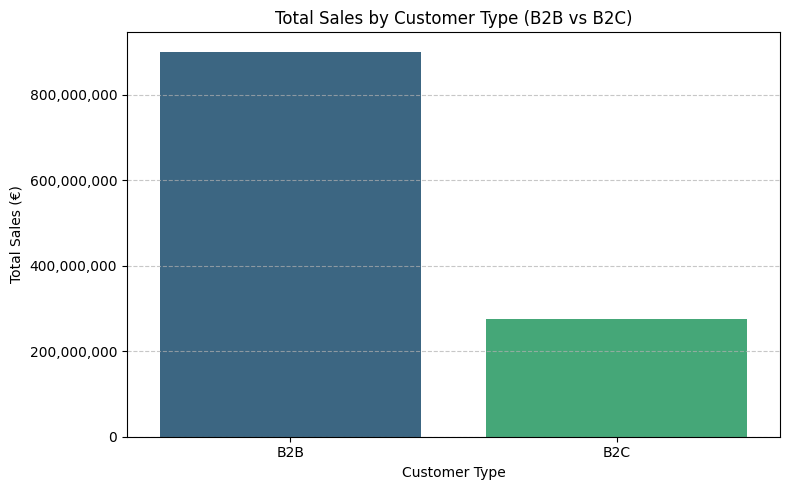

<ipython-input-77-acb3339986ce>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_b2c_transactions, x="Customer_Type", y="Transactions", palette="viridis")


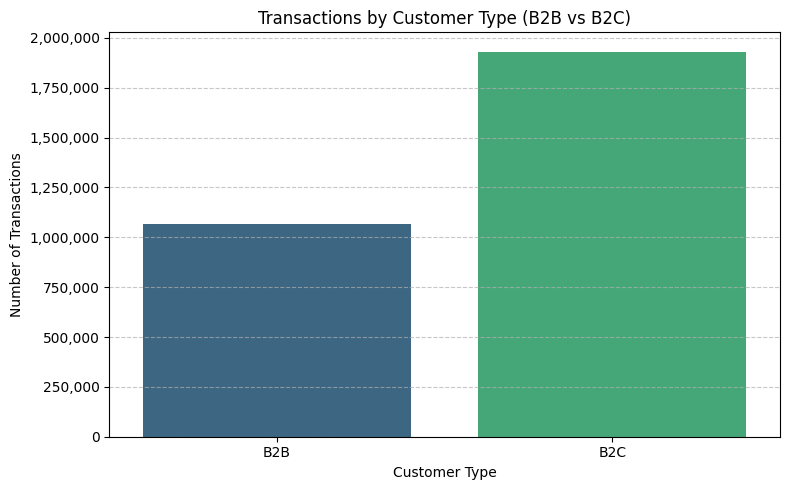

In [ ]:
b2b_b2c_sales = df.groupby('Customer_Type')['Total_Price'].sum().reset_index()

b2b_b2c_transactions = df.groupby('Customer_Type')['Order_ID'].nunique().reset_index()
b2b_b2c_transactions.rename(columns={'Order_ID': 'Transactions'}, inplace=True)


plt.figure(figsize=(8,5))
sns.barplot(data=b2b_b2c_sales, x="Customer_Type", y="Total_Price", palette="viridis")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales (€)")
plt.title("Total Sales by Customer Type (B2B vs B2C)")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=b2b_b2c_transactions, x="Customer_Type", y="Transactions", palette="viridis")
plt.xlabel("Customer Type")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Customer Type (B2B vs B2C)")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


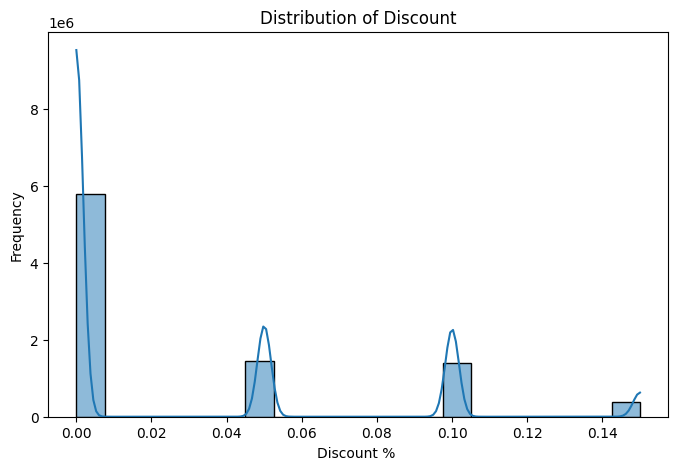

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(df["Discount"], bins = 20 , kde =True)
plt.title("Distribution of Discount")
plt.xlabel("Discount % ")
plt.ylabel("Frequency")
plt.show()

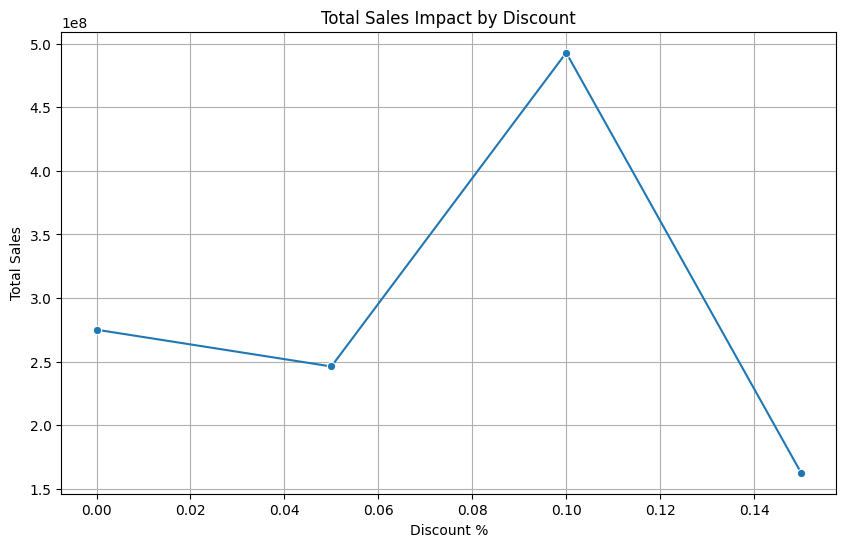

In [ ]:
discount_impact = df.groupby("Discount")["Total_Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Total_Price', data=discount_impact, marker='o')
plt.title("Total Sales Impact by Discount")
plt.xlabel("Discount %")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [ ]:
df.groupby("Discount")["Product"].nunique

<bound method SeriesGroupBy.nunique of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f315a2f03d0>>

In [ ]:
df.groupby('Discount')['Quantity'].sum()


,Quantity
Discount,
0.00,46360564
0.05,48815077
0.10,85916100
0.15,27149380


In [ ]:
df[df['Discount'] == 0.15]['Category'].value_counts()


,count
Category,
Water,95465
Alcoholic Beverages,95333
Juices,95238
Soft Drinks,94981


In [ ]:
df[df['Discount'] == 0.15]['Category'].value_counts()


,count
Category,
Water,95465
Alcoholic Beverages,95333
Juices,95238
Soft Drinks,94981


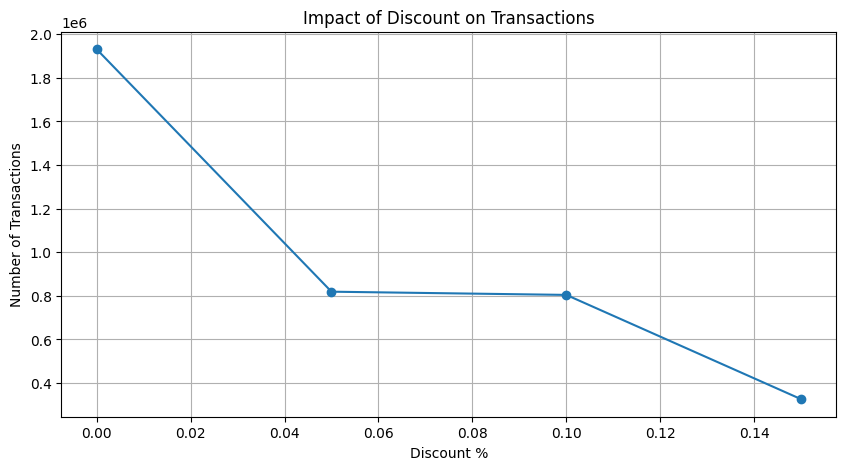

In [ ]:
discount_vs_orders = df.groupby('Discount')['Order_ID'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(discount_vs_orders.index, discount_vs_orders.values, marker="o", linestyle="-")
plt.xlabel("Discount %")
plt.ylabel("Number of Transactions")
plt.title("Impact of Discount on Transactions")
plt.grid()
plt.show()

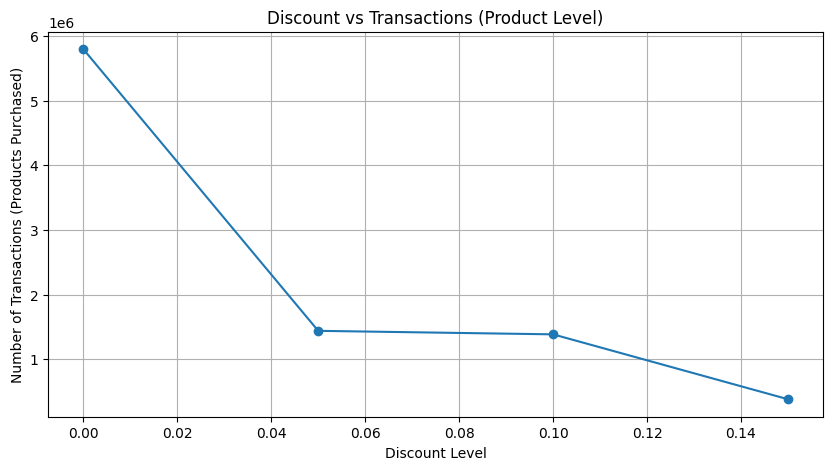

In [ ]:
discount_vs_transactions = df.groupby("Discount")["Order_ID"].count()

plt.figure(figsize=(10, 5))
plt.plot(discount_vs_transactions.index, discount_vs_transactions.values, marker='o', linestyle='-')
plt.xlabel("Discount Level")
plt.ylabel("Number of Transactions (Products Purchased)")
plt.title("Discount vs Transactions (Product Level)")
plt.grid(True)
plt.show()


In [ ]:
print(df.groupby("Category")["Discount"].nunique())



Category
Alcoholic Beverages    4
Juices                 4
Soft Drinks            4
Water                  4
Name: Discount, dtype: int64


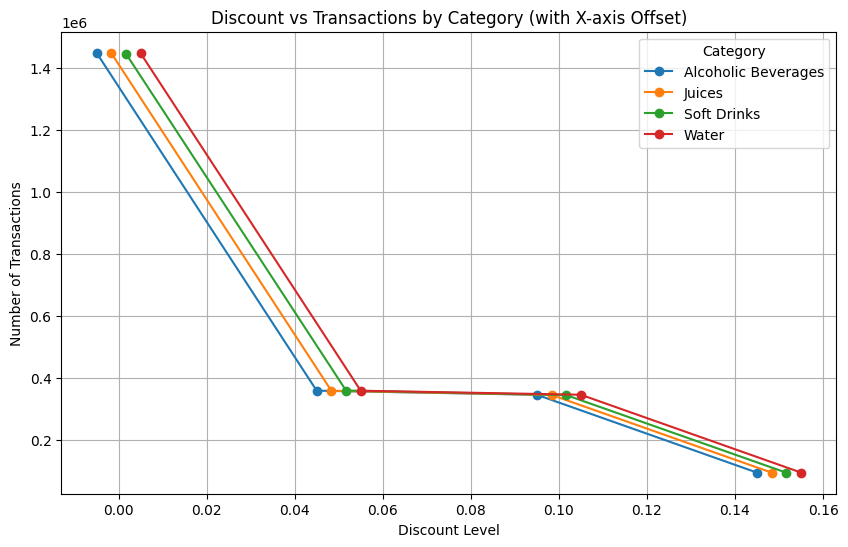

In [ ]:
category_discount = df.groupby(["Discount", "Category"]).size().reset_index(name="Transactions")

# Step 2: Identify unique categories and create a small offset for each category.
unique_categories = category_discount["Category"].unique()
# Since there are only 4 unique discount values, we use a very small offset.
offsets = np.linspace(-0.005, 0.005, num=len(unique_categories))

# Step 3: Plot each category with a slight x-axis offset.
plt.figure(figsize=(10, 6))

for idx, category in enumerate(unique_categories):
    data = category_discount[category_discount["Category"] == category]
    # Apply a small offset to the discount values so that the lines don't overlap exactly.
    plt.plot(data["Discount"] + offsets[idx], data["Transactions"], marker='o',
             linestyle='-', label=category)

plt.xlabel("Discount Level")
plt.ylabel("Number of Transactions")
plt.title("Discount vs Transactions by Category (with X-axis Offset)")
plt.legend(title="Category")
plt.grid(True)
plt.show()

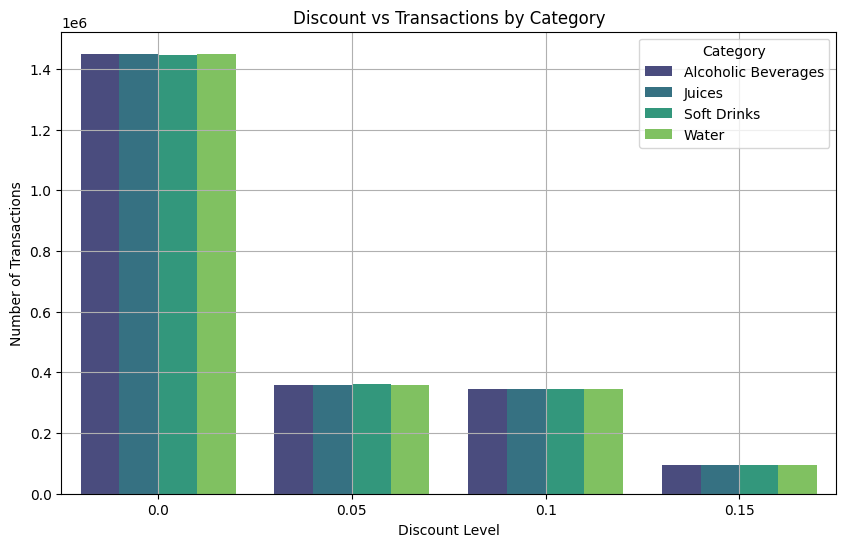

In [ ]:
category_discount = df.groupby(["Discount", "Category"]).size().reset_index(name="Transactions")

plt.figure(figsize=(10, 6))
sns.barplot(data=category_discount, x="Discount", y="Transactions", hue="Category", palette="viridis")
plt.xlabel("Discount Level")
plt.ylabel("Number of Transactions")
plt.title("Discount vs Transactions by Category")
plt.legend(title="Category")
plt.grid(True)
plt.show()

In [ ]:
print(category_discount)


    Discount             Category  Transactions
0       0.00  Alcoholic Beverages       1450052
1       0.00               Juices       1449300
2       0.00          Soft Drinks       1447416
3       0.00                Water       1448637
4       0.05  Alcoholic Beverages        359713
5       0.05               Juices        359444
6       0.05          Soft Drinks        360187
7       0.05                Water        359555
8       0.10  Alcoholic Beverages        346527
9       0.10               Juices        345955
10      0.10          Soft Drinks        345547
11      0.10                Water        346560
12      0.15  Alcoholic Beverages         95333
13      0.15               Juices         95238
14      0.15          Soft Drinks         94981
15      0.15                Water         95465


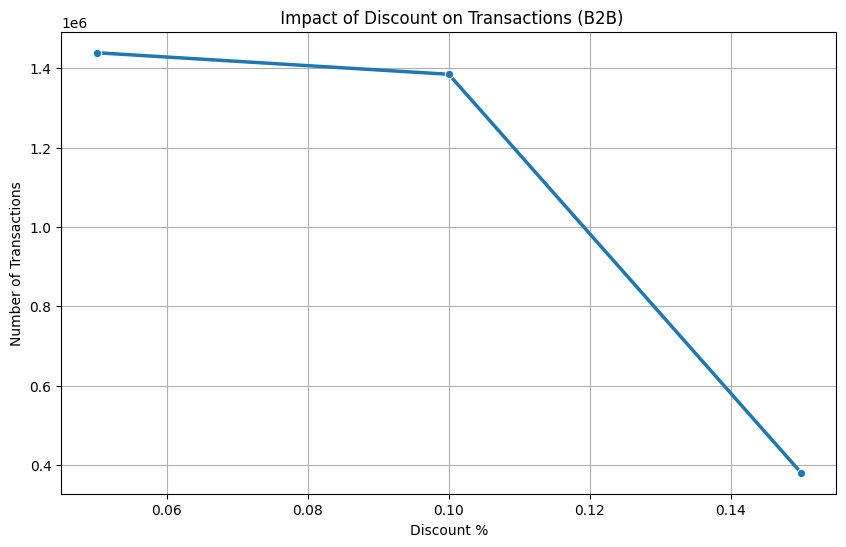

In [ ]:
b2b_df = df[df['Customer_Type'] == 'B2B']

discount_transactions = b2b_df.groupby('Discount').size().reset_index( name = "Transactions")

plt.figure(figsize =(10,6))
sns.lineplot(data= discount_transactions, x= "Discount", y = "Transactions", marker = "o", linewidth=2.5)
plt.xlabel("Discount %")
plt.ylabel("Number of Transactions")
plt.title(" Impact of Discount on Transactions (B2B)")
plt.grid(True)
plt.show()


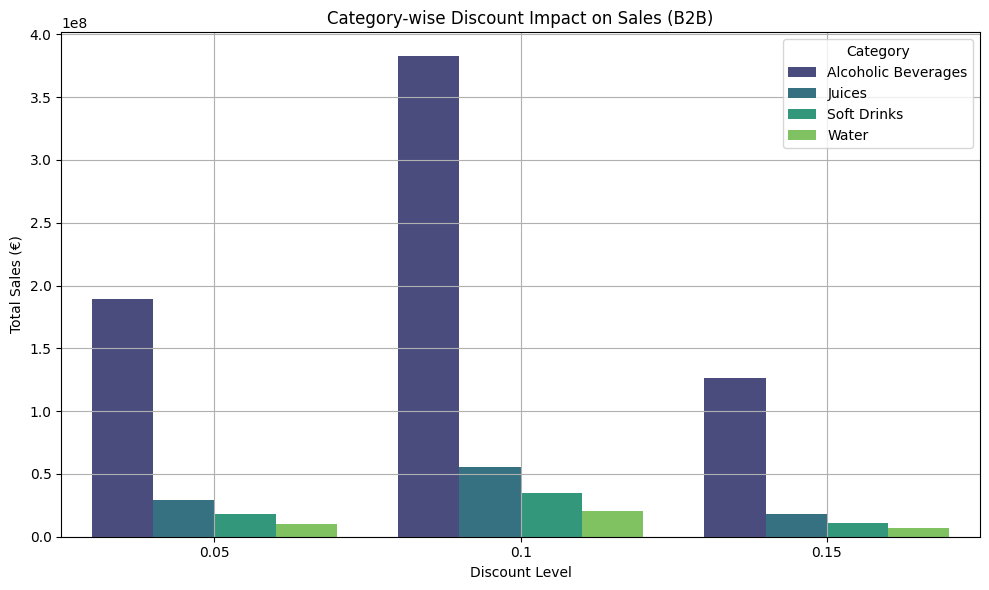

In [ ]:


b2b_discount_sales = b2b_df.groupby(["Discount", "Category"])["Total_Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=b2b_discount_sales, x="Discount", y="Total_Price", hue="Category", palette="viridis")

plt.xlabel("Discount Level")
plt.ylabel("Total Sales (€)")
plt.title("Category-wise Discount Impact on Sales (B2B)")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation of Category-wise Correlation between Discount & Sales**




In [ ]:
category_correlation = b2b_df.groupby('Category')[['Discount', 'Total_Price']].corr().iloc[0::2, -1]
print("Category-wise correlation between Discount and Sales:")
print(category_correlation)

Category-wise correlation between Discount and Sales:
Category                     
Alcoholic Beverages  Discount    0.210909
Juices               Discount    0.463467
Soft Drinks          Discount    0.381316
Water                Discount    0.435590
Name: Total_Price, dtype: float64


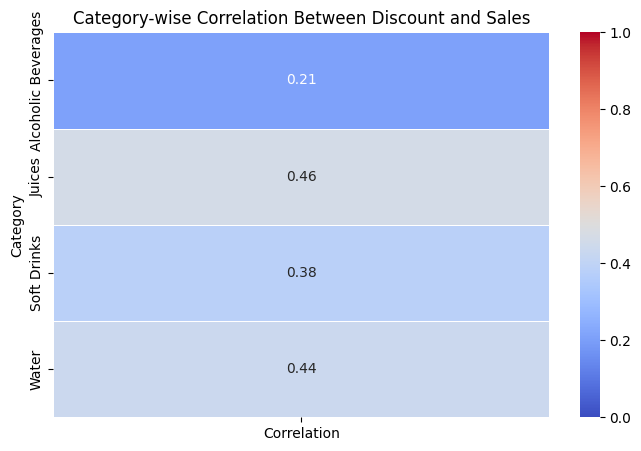

In [ ]:
category_correlation = {
    "Alcoholic Beverages": 0.210909,
    "Juices": 0.463467,
    "Soft Drinks": 0.381316,
    "Water": 0.435590
}
corr_df = pd.DataFrame.from_dict(category_correlation, orient='index', columns=['Correlation'])

plt.figure(figsize=(8, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=0, vmax=1)
plt.title("Category-wise Correlation Between Discount and Sales")
plt.xlabel("")
plt.ylabel("Category")
plt.show()

In [ ]:
df['Category_vague'] = df['Category'].apply(lambda x: 'Alcoholic' if x == 'Alcoholic Beverages' else 'Non-Alcoholic')
df.head(10)


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Category_vague
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,Non-Alcoholic
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,Non-Alcoholic
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,Non-Alcoholic
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,Non-Alcoholic
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,Non-Alcoholic
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16,Alcoholic
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20,Non-Alcoholic
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20,Non-Alcoholic
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20,Non-Alcoholic
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20,Non-Alcoholic


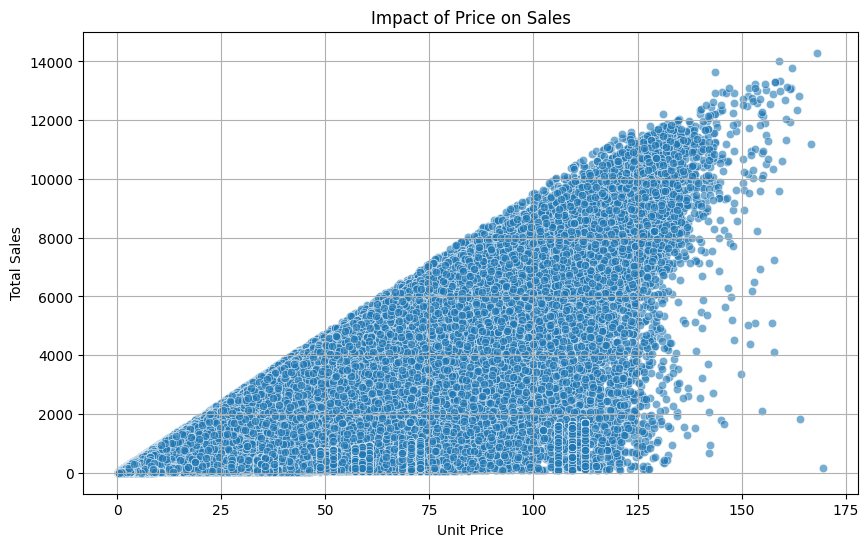

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unit_Price', y='Total_Price', alpha=0.6)
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.title("Impact of Price on Sales")
plt.grid(True)
plt.show()

<ipython-input-96-f2e0530eda03>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = df.groupby('Price_Range')['Total_Price'].sum().reset_index()
<ipython-input-96-f2e0530eda03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_range_sales, x='Price_Range', y='Total_Price', palette='coolwarm')


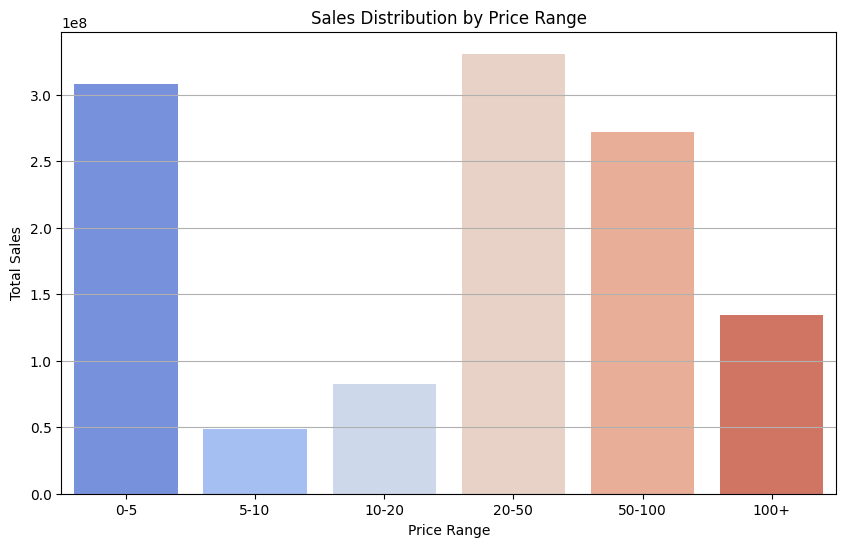

In [ ]:
df['Price_Range'] = pd.cut(df['Unit_Price'], bins=[0, 5, 10, 20, 50, 100, df['Unit_Price'].max()],
                           labels=['0-5', '5-10', '10-20', '20-50', '50-100', '100+'])

price_range_sales = df.groupby('Price_Range')['Total_Price'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=price_range_sales, x='Price_Range', y='Total_Price', palette='coolwarm')
plt.xlabel("Price Range")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Price Range")
plt.grid(axis='y')
plt.show()

In [ ]:
category_price_corr = df.groupby('Category')[['Unit_Price', 'Total_Price']].corr().iloc[0::2, -1]
print(category_price_corr)

Category                       
Alcoholic Beverages  Unit_Price    0.566694
Juices               Unit_Price    0.324659
Soft Drinks          Unit_Price    0.465010
Water                Unit_Price    0.389920
Name: Total_Price, dtype: float64


In [ ]:
price_sales_corr = df[['Unit_Price', 'Total_Price']].corr()
print(price_sales_corr)

             Unit_Price  Total_Price
Unit_Price     1.000000     0.620649
Total_Price    0.620649     1.000000


In [ ]:
df["Year"] = df["Order_Date"].dt.year
df["Quarter"] = df["Order_Date"].dt.to_period("Q")


In [ ]:
quarterly_sales = df.groupby(["Year", "Quarter", "Region"])["Total_Price"].sum().reset_index()


In [ ]:
df["Quarter"] = df["Quarter"].astype(str)



In [ ]:
df["Quarter"] = pd.PeriodIndex(df["Quarter"], freq="Q")


In [ ]:
top_regions = ["Saarland", "Hamburg", "Hessen"]
filtered_sales = quarterly_sales[quarterly_sales["Region"].isin(top_regions)]


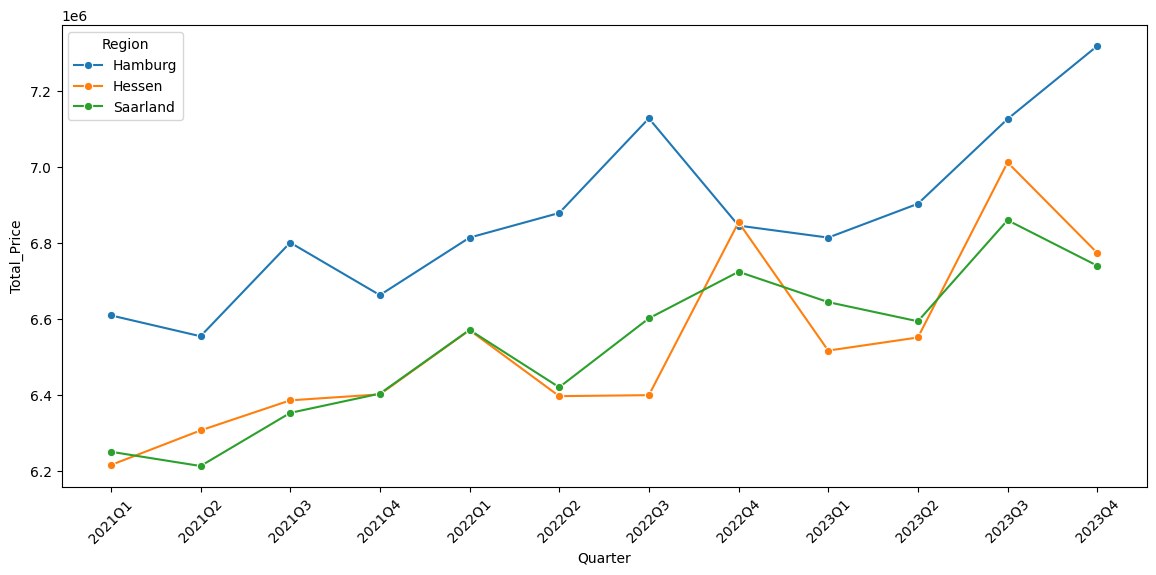

In [ ]:
filtered_sales = filtered_sales.copy()  # Ensure modifications are safe
filtered_sales["Quarter"] = filtered_sales["Quarter"].astype(str)  # Convert Period to string

# Now, plot again
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_sales, x="Quarter", y="Total_Price", hue="Region", marker="o", palette="tab10")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Sort data by Region and Quarter
filtered_sales = filtered_sales.sort_values(["Region", "Quarter"])

# Convert 'Quarter' to string if needed
filtered_sales["Quarter"] = filtered_sales["Quarter"].astype(str)

# Calculate QoQ Growth %
filtered_sales["QoQ Growth (%)"] = (
    filtered_sales.groupby("Region")["Total_Price"]
    .pct_change() * 100
)

# Display results
filtered_sales[["Region", "Quarter", "Total_Price", "QoQ Growth (%)"]]



,Region,Quarter,Total_Price,QoQ Growth (%)
5,Hamburg,2021Q1,6610662.08,NaN
21,Hamburg,2021Q2,6555770.72,-0.830346
37,Hamburg,2021Q3,6802216.59,3.759220
53,Hamburg,2021Q4,6664022.40,-2.031605
69,Hamburg,2022Q1,6815325.44,2.270446
85,Hamburg,2022Q2,6880177.36,0.951560
101,Hamburg,2022Q3,7129150.99,3.618709
117,Hamburg,2022Q4,6846900.37,-3.959106
133,Hamburg,2023Q1,6815321.71,-0.461211
149,Hamburg,2023Q2,6904382.92,1.306779


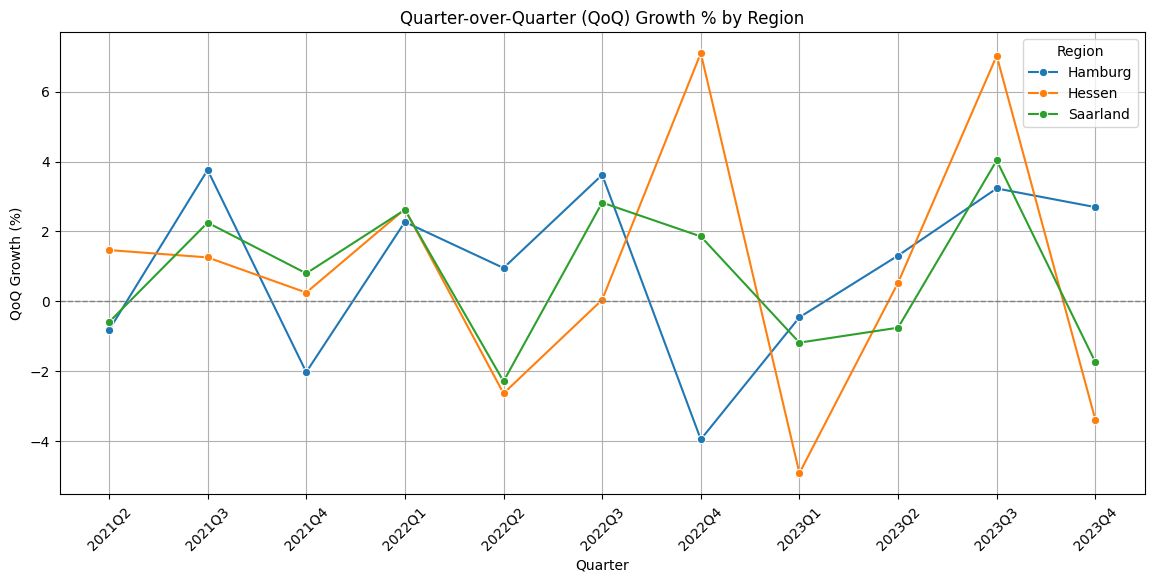

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_sales, x="Quarter", y="QoQ Growth (%)", hue="Region", marker="o", palette="tab10")

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.ylabel("QoQ Growth (%)")
plt.title("Quarter-over-Quarter (QoQ) Growth % by Region")
plt.grid(True)
plt.legend(title="Region")

plt.show()


In [ ]:
top_regions = region_total_sales.head(3).index.tolist()
bottom_regions = region_total_sales.tail(3).index.tolist()

print("Top 3 Regions by Sales:", top_regions)
print("Bottom 3 Regions by Sales:", bottom_regions)

Top 3 Regions by Sales: ['Hamburg', 'Hessen', 'Saarland']
Bottom 3 Regions by Sales: ['Schleswig-Holstein', 'Sachsen-Anhalt', 'Bremen']


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Quarter'] = df['Order_Date'].dt.to_period("Q").astype(str)

In [ ]:
quarterly_sales = df.groupby(["Year", "Quarter", "Region"])["Total_Price"].sum().reset_index()


In [ ]:
selected_regions = top_regions + bottom_regions

filtered_trend = quarterly_sales[quarterly_sales["Region"].isin(selected_regions)]

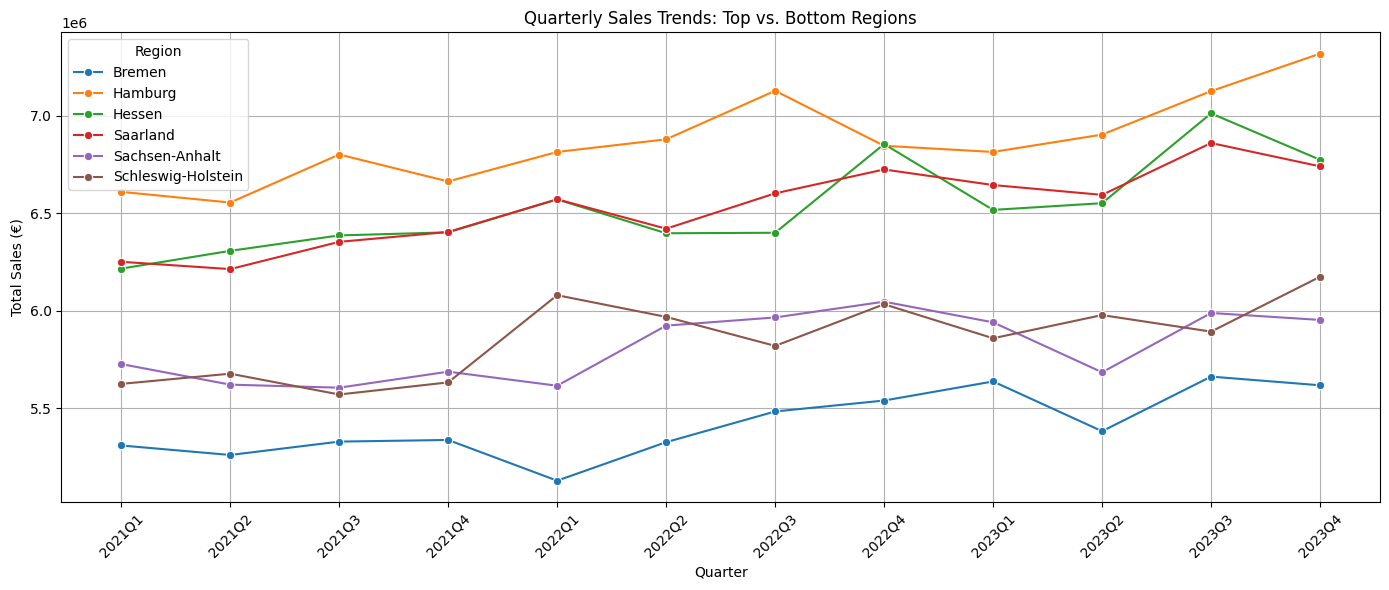

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=filtered_trend, x="Quarter", y="Total_Price", hue="Region", marker="o", palette="tab10")
plt.xticks(rotation=45)
plt.title("Quarterly Sales Trends: Top vs. Bottom Regions")
plt.xlabel("Quarter")
plt.ylabel("Total Sales (€)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

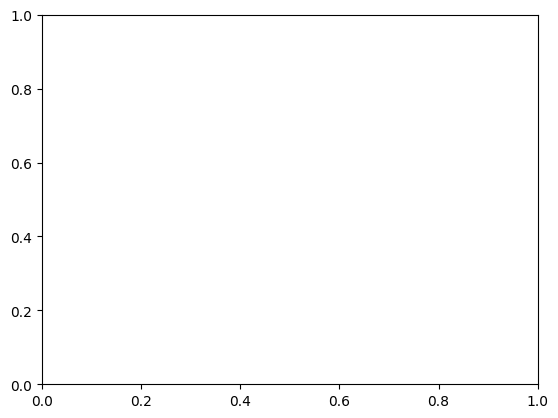

In [ ]:
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

In [ ]:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


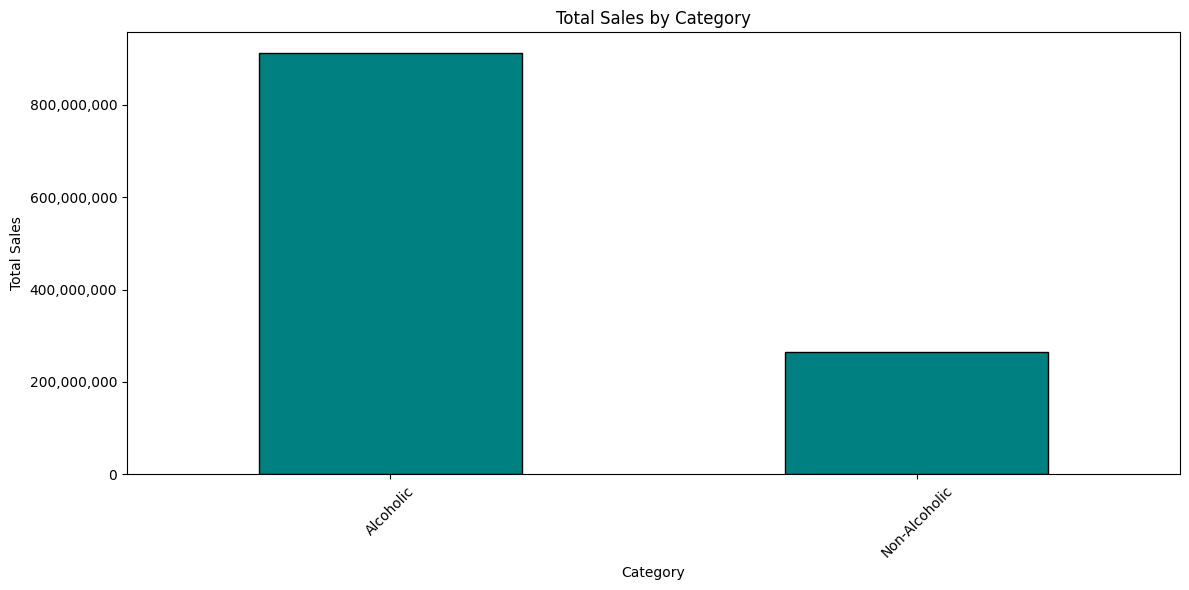

In [ ]:
Vcategory_wise_sales = df.groupby("Category_vague")["Total_Price"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = Vcategory_wise_sales.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

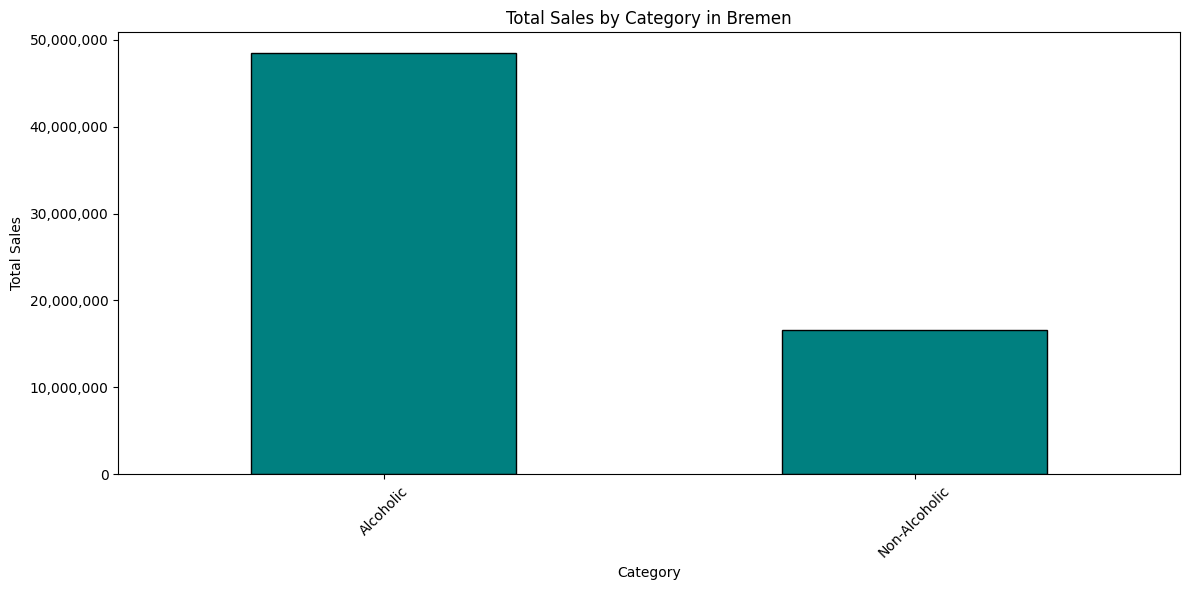

In [ ]:
bremen_sales = df[df['Region'] == 'Bremen'].groupby('Category_vague')['Total_Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = bremen_sales.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Sales by Category in Bremen')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()


In [ ]:

top_sold_products = df.groupby(['Region', 'Product'])['Quantity'].sum().reset_index()
top_sold_products = top_sold_products.loc[top_sold_products.groupby('Region')['Quantity'].idxmax()]

top_sold_products = top_sold_products.merge(df[['Product', 'Category']], on='Product', how='left')

top_sold_products = top_sold_products.drop_duplicates()
print(top_sold_products.to_string(index=False))



                Region             Product  Quantity            Category
     Baden-Württemberg     Cranberry Juice    453330              Juices
                Bayern       Granini Apple    461114              Juices
                Berlin          Fritz-Kola    791639         Soft Drinks
           Brandenburg       Granini Apple    459616              Juices
                Bremen              Beck's    764328 Alcoholic Beverages
               Hamburg          Fritz-Kola    644837         Soft Drinks
                Hessen      Hohes C Orange    611366              Juices
Mecklenburg-Vorpommern       Granini Apple    477736              Juices
         Niedersachsen      Hohes C Orange    563002              Juices
   Nordrhein-Westfalen               Fanta    482425         Soft Drinks
       Rheinland-Pfalz              Vittel    525317               Water
              Saarland      Hohes C Orange    497767              Juices
               Sachsen        Tomato Juice    45741

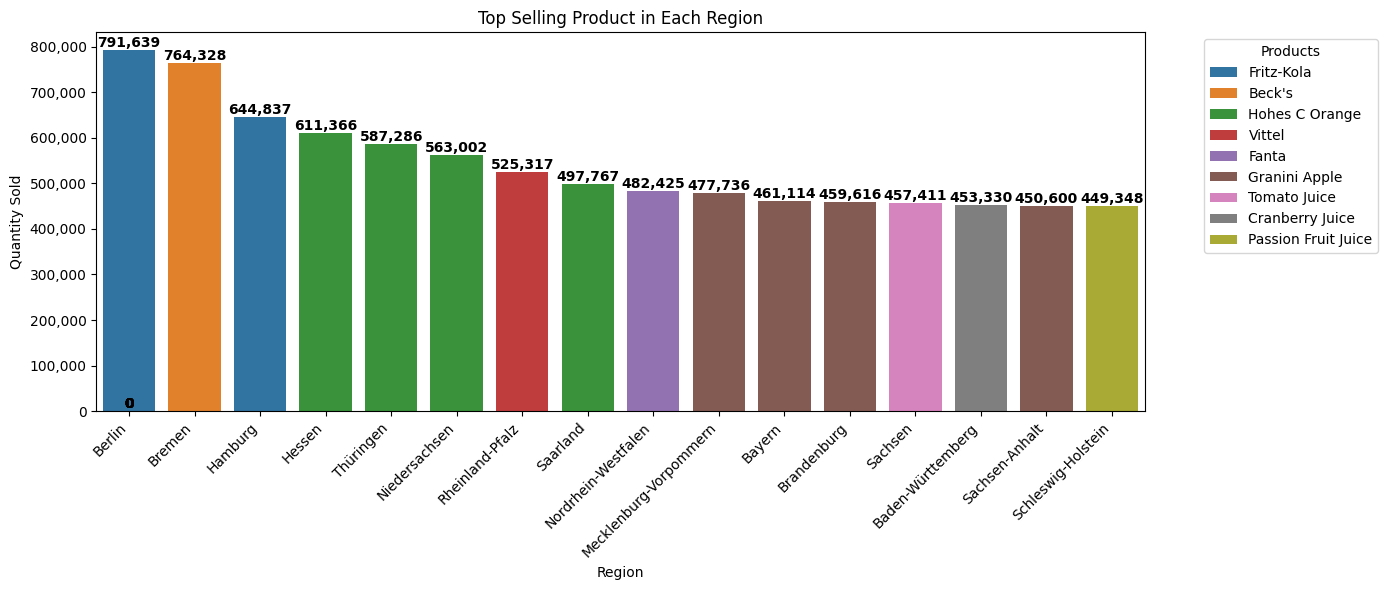

In [ ]:
top_sold_products = top_sold_products.sort_values(by='Quantity', ascending=False)

# Set figure size
plt.figure(figsize=(14, 6))

palette = sns.color_palette("tab10", n_colors=len(top_sold_products['Product'].unique()))

# Create the bar plot
ax = sns.barplot(data=top_sold_products, x='Region', y='Quantity', hue='Product', dodge=False, palette=palette)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Format Y-axis to remove scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom", fontsize=10, color="black", fontweight="bold"
    )

# Add title and labels
plt.title('Top Selling Product in Each Region')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')

# Display legend outside the plot for clarity
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()